**Question 1:**
Use Digit dataset and perform the Logistic Regression. Import the dataset from Sklearn

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


# Importing dataset from sklearn

In [3]:
from sklearn.datasets import load_digits
data=load_digits()
data


{'DESCR': ".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number o

In [4]:
dir(data)

['DESCR', 'data', 'images', 'target', 'target_names']

In [5]:
data.data.shape

(1797, 64)

In [6]:
data.target.shape

(1797,)

In [7]:
data.target

array([0, 1, 2, ..., 8, 9, 8])

Spliting the train and test data 

In [8]:
from sklearn.model_selection import train_test_split ## training and testing
from sklearn.linear_model import LogisticRegression  ## for logistic regression
from sklearn.metrics import accuracy_score,confusion_matrix ## checking accuracy and confusion matrix 
from sklearn.preprocessing import StandardScaler ## scaling down the features

In [9]:
xtrain,xtest,ytrain,ytest=train_test_split(data.data,data.target,test_size=0.2,random_state=1)

In [10]:
print('\n xtrain:',xtrain.shape)
print('\n xtest:',xtest.shape)
print('\n ytrain:',ytrain.shape)
print('\n ytest:',ytest.shape)


 xtrain: (1437, 64)

 xtest: (360, 64)

 ytrain: (1437,)

 ytest: (360,)


Scaling down the feature 

In [11]:
scaler= StandardScaler()
scaler.fit(xtrain)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [12]:
scaled_xtrain=scaler.fit_transform(xtrain)
scaled_xtest=scaler.fit_transform(xtest)

Logistic Regression


In [13]:
log_reg=LogisticRegression()
log_reg.fit(scaled_xtrain,ytrain)   ## as we have scaled down the xtrain we use scaled_xtrain

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
ypred=log_reg.predict(scaled_xtest)

In [15]:
ypred


array([1, 5, 0, 7, 1, 0, 6, 1, 5, 4, 9, 2, 7, 8, 4, 6, 9, 3, 7, 4, 7, 1,
       8, 6, 0, 9, 6, 1, 3, 7, 5, 9, 8, 3, 2, 8, 8, 1, 1, 0, 7, 9, 0, 0,
       8, 7, 2, 7, 4, 3, 4, 3, 4, 0, 4, 7, 0, 5, 5, 5, 2, 1, 7, 0, 5, 1,
       8, 3, 3, 4, 0, 3, 7, 4, 3, 4, 2, 9, 7, 3, 2, 5, 3, 4, 1, 5, 5, 2,
       1, 2, 2, 2, 2, 7, 0, 8, 1, 7, 4, 2, 3, 8, 2, 3, 3, 0, 2, 9, 5, 2,
       3, 2, 8, 1, 1, 9, 1, 2, 0, 4, 8, 5, 4, 4, 7, 6, 7, 6, 6, 1, 7, 5,
       6, 3, 8, 3, 7, 1, 8, 5, 3, 4, 7, 8, 5, 0, 6, 0, 6, 3, 7, 6, 5, 6,
       2, 2, 2, 3, 0, 7, 6, 5, 6, 4, 1, 0, 6, 0, 6, 4, 0, 9, 3, 5, 9, 2,
       3, 1, 9, 0, 7, 6, 2, 9, 3, 5, 3, 4, 6, 3, 3, 7, 4, 9, 2, 7, 6, 1,
       6, 8, 4, 0, 3, 1, 0, 9, 9, 9, 0, 1, 2, 6, 8, 0, 9, 5, 9, 8, 2, 3,
       5, 3, 0, 8, 7, 4, 0, 3, 3, 3, 6, 3, 3, 2, 9, 1, 6, 9, 0, 4, 2, 2,
       7, 9, 1, 6, 7, 6, 3, 9, 1, 9, 3, 4, 0, 6, 4, 8, 5, 3, 6, 3, 1, 4,
       0, 4, 4, 8, 7, 9, 1, 5, 2, 7, 0, 9, 0, 4, 4, 0, 1, 0, 6, 4, 2, 8,
       5, 0, 2, 6, 0, 1, 8, 2, 0, 9, 5, 6, 2, 0, 5,

In [16]:
print('ACcuracy:',accuracy_score(ytest,ypred))

ACcuracy: 0.9805555555555555


*above our model got 98%  accuracy *

In [17]:
matrix= confusion_matrix(ytest,ypred)  
matrix

array([[43,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  0, 36,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 41,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 38,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  1,  0, 28,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 37,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 36,  0,  1],
       [ 0,  0,  1,  0,  0,  1,  0,  0, 27,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 33]])

Text(105.0, 0.5, 'Predicted values')

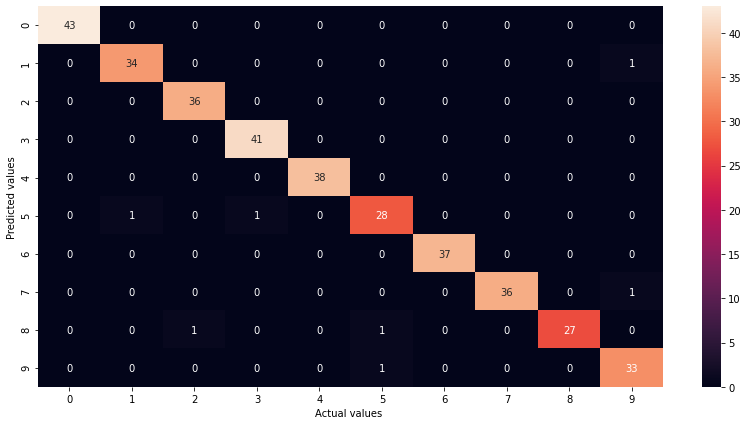

In [18]:
plt.figure(figsize=(14,7))
sns.heatmap(matrix,annot=True)
plt.xlabel('Actual values ')
plt.ylabel('Predicted values')


In [19]:
## classification report table 
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.97      0.97      0.97        35
           2       0.97      1.00      0.99        36
           3       0.98      1.00      0.99        41
           4       1.00      1.00      1.00        38
           5       0.93      0.93      0.93        30
           6       1.00      1.00      1.00        37
           7       1.00      0.97      0.99        37
           8       1.00      0.93      0.96        29
           9       0.94      0.97      0.96        34

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

